# Data 611, Final Project
# Group 3: Ismael Bah, Tabatha Heaton, Matt Briskey
# Predict the deault of a credit card

### Background Information
The training data set includes a binary variable, default payment (Yes = 1, No = 0), as the target variable, and the following 23 variables as the features variables:

* X1: Amount of the given credit
* X2: Gender (1 = male; 2 = female)
* X3: Education (1 = graduate school; 2 = university; 3 = high school; 4 = others)
* X4: Marital status (1 = married; 2 = single; 3 = others)
* X5: Age
* X6 - X11: History of past payment. We tracked the past monthly payment records (from April to September, 2005) as follows: X6 = the repayment status in September, 2005; X7 = the repayment status in August, 2005; . . .;X11 = the repayment status in April, 2005. The measurement scale for the repayment status is: -1 = pay duly; 1 = payment delay for one month; 2 = payment delay for two months; . . .; 8 = payment delay for eight months; 9 = payment delay for nine months and above.
* X12-X17: Amount of bill statement. X12 = amount of bill statement in September, 2005; X13 = amount of bill statement in August, 2005; . . .; X17 = amount of bill statement in April, 2005.
* X18-X23: Amount of previous payment. X18 = amount paid in September, 2005; X19 = amount paid in August, 2005; . . .;X23 = amount paid in April, 2005.

***

### Explore the Data

In [1]:
import pandas as pd

df = pd.read_csv('https://raw.githubusercontent.com/franklin-univ-data-science/data/master/credit_default.csv')

df

,ID,X1,X2,X3,X4,X5,X6,X7,X8,X9,...,X15,X16,X17,X18,X19,X20,X21,X22,X23,Y
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,29996,220000,1,3,1,39,0,0,0,0,...,88004,31237,15980,8500,20000,5003,3047,5000,1000,0
29996,29997,150000,1,3,2,43,-1,-1,-1,-1,...,8979,5190,0,1837,3526,8998,129,0,0,0
29997,29998,30000,1,2,2,37,4,3,2,-1,...,20878,20582,19357,0,0,22000,4200,2000,3100,1
29998,29999,80000,1,3,1,41,1,-1,0,0,...,52774,11855,48944,85900,3409,1178,1926,52964,1804,1


In [2]:
# Rename the columns so they are easier to work with

dict = {'X1': 'Credit_given',
        'X2': 'Gender',
        'X3': 'Education',
        'X4': 'Marital_Status',
        'X5': 'Age',
        'X6': 'Pay_1',
        'X7': 'Pay_2',
        'X8': 'Pay_3',
        'X9': 'Pay_4',
        'X10': 'Pay_5',
        'X11': 'Pay_6',
        'X12': 'Bill_1',
        'X13': 'Bill_2',
        'X14': 'Bill_3',
        'X15': 'Bill_4',
        'X16': 'Bill_5',
        'X17': 'Bill_6',
        'X18': 'Pay_Amt1',
        'X19': 'Pay_Amt2',
        'X20': 'Pay_Amt3',
        'X21': 'Pay_Amt4',
        'X22': 'Pay_Amt5',
        'X23': 'Pay_Amt6',
        'Y': 'Defaulted'}
 
# call rename () method
df.rename(columns=dict,
          inplace=True)
 
# print data frame after renaming columns
display(df)

,ID,Credit_given,Gender,Education,Marital_Status,Age,Pay_1,Pay_2,Pay_3,Pay_4,...,Bill_4,Bill_5,Bill_6,Pay_Amt1,Pay_Amt2,Pay_Amt3,Pay_Amt4,Pay_Amt5,Pay_Amt6,Defaulted
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,29996,220000,1,3,1,39,0,0,0,0,...,88004,31237,15980,8500,20000,5003,3047,5000,1000,0
29996,29997,150000,1,3,2,43,-1,-1,-1,-1,...,8979,5190,0,1837,3526,8998,129,0,0,0
29997,29998,30000,1,2,2,37,4,3,2,-1,...,20878,20582,19357,0,0,22000,4200,2000,3100,1
29998,29999,80000,1,3,1,41,1,-1,0,0,...,52774,11855,48944,85900,3409,1178,1926,52964,1804,1


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   ID              30000 non-null  int64
 1   Credit_given    30000 non-null  int64
 2   Gender          30000 non-null  int64
 3   Education       30000 non-null  int64
 4   Marital_Status  30000 non-null  int64
 5   Age             30000 non-null  int64
 6   Pay_1           30000 non-null  int64
 7   Pay_2           30000 non-null  int64
 8   Pay_3           30000 non-null  int64
 9   Pay_4           30000 non-null  int64
 10  Pay_5           30000 non-null  int64
 11  Pay_6           30000 non-null  int64
 12  Bill_1          30000 non-null  int64
 13  Bill_2          30000 non-null  int64
 14  Bill_3          30000 non-null  int64
 15  Bill_4          30000 non-null  int64
 16  Bill_5          30000 non-null  int64
 17  Bill_6          30000 non-null  int64
 18  Pay_Amt1        30000 non-

> There don't appear to be any null values which is good

In [4]:
df.describe()

,ID,Credit_given,Gender,Education,Marital_Status,Age,Pay_1,Pay_2,Pay_3,Pay_4,...,Bill_4,Bill_5,Bill_6,Pay_Amt1,Pay_Amt2,Pay_Amt3,Pay_Amt4,Pay_Amt5,Pay_Amt6,Defaulted
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,...,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.00000,30000.000000,30000.000000,30000.000000,30000.000000
mean,15000.500000,167484.322667,1.603733,1.853133,1.551867,35.485500,-0.016700,-0.133767,-0.166200,-0.220667,...,43262.948967,40311.400967,38871.760400,5663.580500,5.921163e+03,5225.68150,4826.076867,4799.387633,5215.502567,0.221200
std,8660.398374,129747.661567,0.489129,0.790349,0.521970,9.217904,1.123802,1.197186,1.196868,1.169139,...,64332.856134,60797.155770,59554.107537,16563.280354,2.304087e+04,17606.96147,15666.159744,15278.305679,17777.465775,0.415062
min,1.000000,10000.000000,1.000000,0.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,...,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000,0.000000
25%,7500.750000,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,2326.750000,1763.000000,1256.000000,1000.000000,8.330000e+02,390.00000,296.000000,252.500000,117.750000,0.000000
50%,15000.500000,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,...,19052.000000,18104.500000,17071.000000,2100.000000,2.009000e+03,1800.00000,1500.000000,1500.000000,1500.000000,0.000000
75%,22500.250000,240000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,...,54506.000000,50190.500000,49198.250000,5006.000000,5.000000e+03,4505.00000,4013.250000,4031.500000,4000.000000,0.000000
max,30000.000000,1000000.000000,2.000000,6.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,...,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.00000,621000.000000,426529.000000,528666.000000,1.000000


***

#### Categorical Data

In [5]:
# Explroing the Gender data
df['Gender'].value_counts() # (1 = male; 2 = female)

2    18112
1    11888
Name: Gender, dtype: int64

<AxesSubplot:>

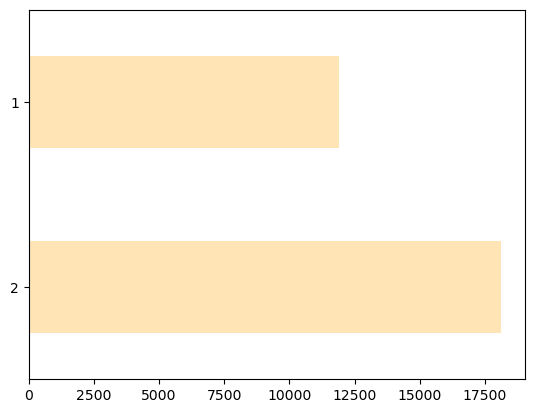

In [6]:
df.Gender.value_counts().plot(kind = "barh", color = "moccasin")

In [7]:
# Explroing the Education data
df['Education'].value_counts() # (1 = graduate school; 2 = university; 3 = high school; 4 = others)

2    14030
1    10585
3     4917
5      280
4      123
6       51
0       14
Name: Education, dtype: int64

In [8]:
# There aren't descriptions listed for 0, 5, and 6 shown above so it makes sense to combine them in the 4 bucket (Other)

fil = (df['Education'] == 5) | (df['Education'] == 6) | (df['Education'] == 0)
df.loc[fil, 'Education'] = 4
df['Education'].value_counts()

2    14030
1    10585
3     4917
4      468
Name: Education, dtype: int64

<AxesSubplot:>

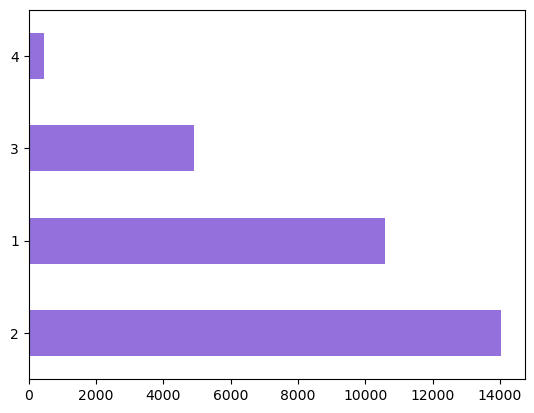

In [9]:
df.Education.value_counts().plot(kind = "barh", color="mediumpurple")

In [10]:
# Explroing the Marital status data (1 = married; 2 = single; 3 = others)

df['Marital_Status'].value_counts()

2    15964
1    13659
3      323
0       54
Name: Marital_Status, dtype: int64

In [11]:
# There isn't a description listed for 0 so it makes sense to combine it in the 3 bucket (Other)

fil = (df['Marital_Status'] == 0)
df.loc[fil, 'Marital_Status'] = 3
df['Marital_Status'].value_counts()

2    15964
1    13659
3      377
Name: Marital_Status, dtype: int64

<AxesSubplot:>

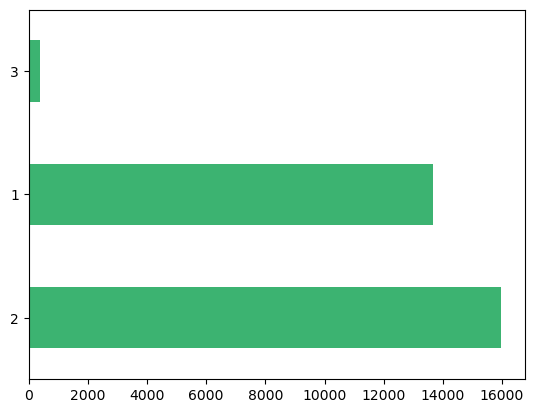

In [12]:
df.Marital_Status.value_counts().plot(kind = "barh", color ="mediumseagreen")

C:\Users\16145\anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.25.1
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


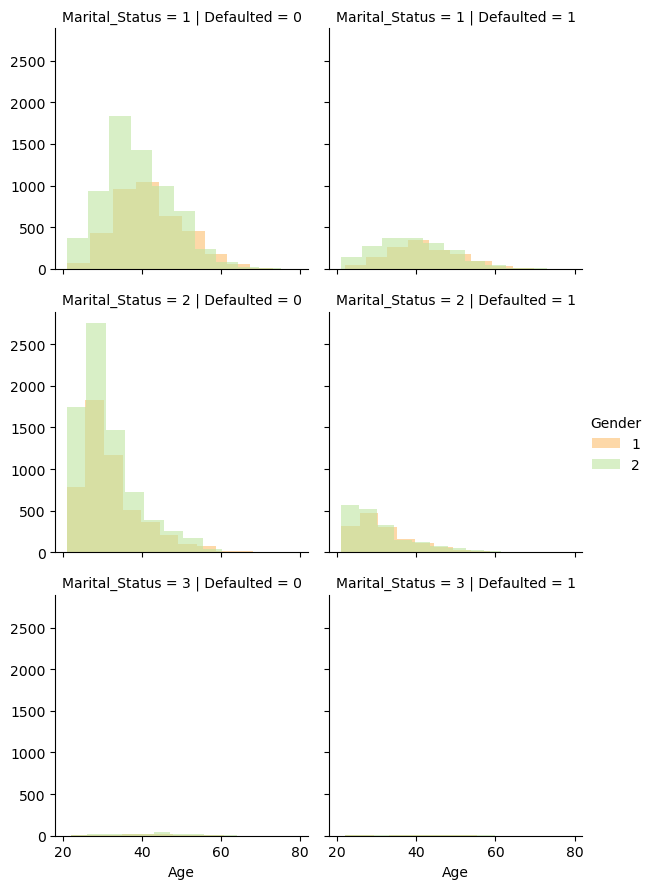

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')


g = sns.FacetGrid(df, col='Defaulted', row= "Marital_Status", hue='Gender', palette ="Spectral")
g.map(plt.hist, 'Age', alpha=0.6, bins=10) 
g.add_legend()

***

#### Numerical Data

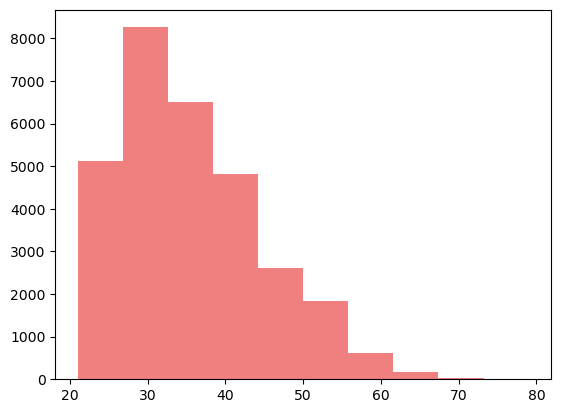

In [14]:
import matplotlib.pyplot as plt
import numpy as np

x = df['Age']

plt.hist(x, color ="lightcoral")
plt.show() 

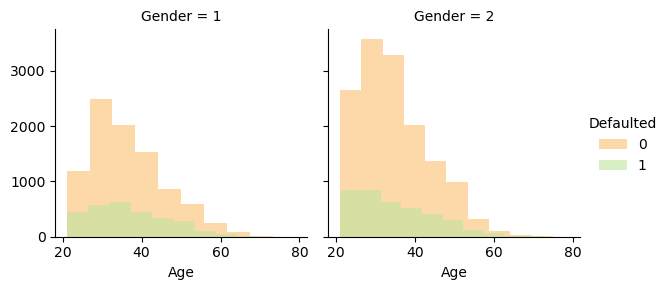

In [15]:
g = sns.FacetGrid(df, col='Gender', hue='Defaulted', palette ="Spectral")
g.map(plt.hist, 'Age', alpha=0.6, bins=10, ) #alpha is for opacity
g.add_legend()

In [16]:
df['Credit_given'].describe()

count      30000.000000
mean      167484.322667
std       129747.661567
min        10000.000000
25%        50000.000000
50%       140000.000000
75%       240000.000000
max      1000000.000000
Name: Credit_given, dtype: float64

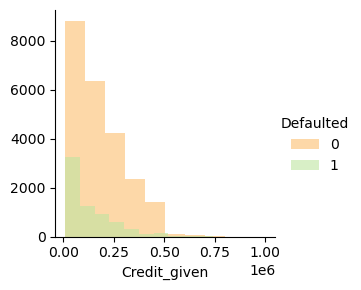

In [17]:
c = sns.FacetGrid(df, hue='Defaulted', palette ="Spectral")
c.map(plt.hist, 'Credit_given', alpha=0.6) 
c.add_legend()

> The above shows that the lower the credit given, the greater the chance of default which makes intuitive sense becuase a credit card company wouldn't give a $1M credit limit to an untrustworthy person

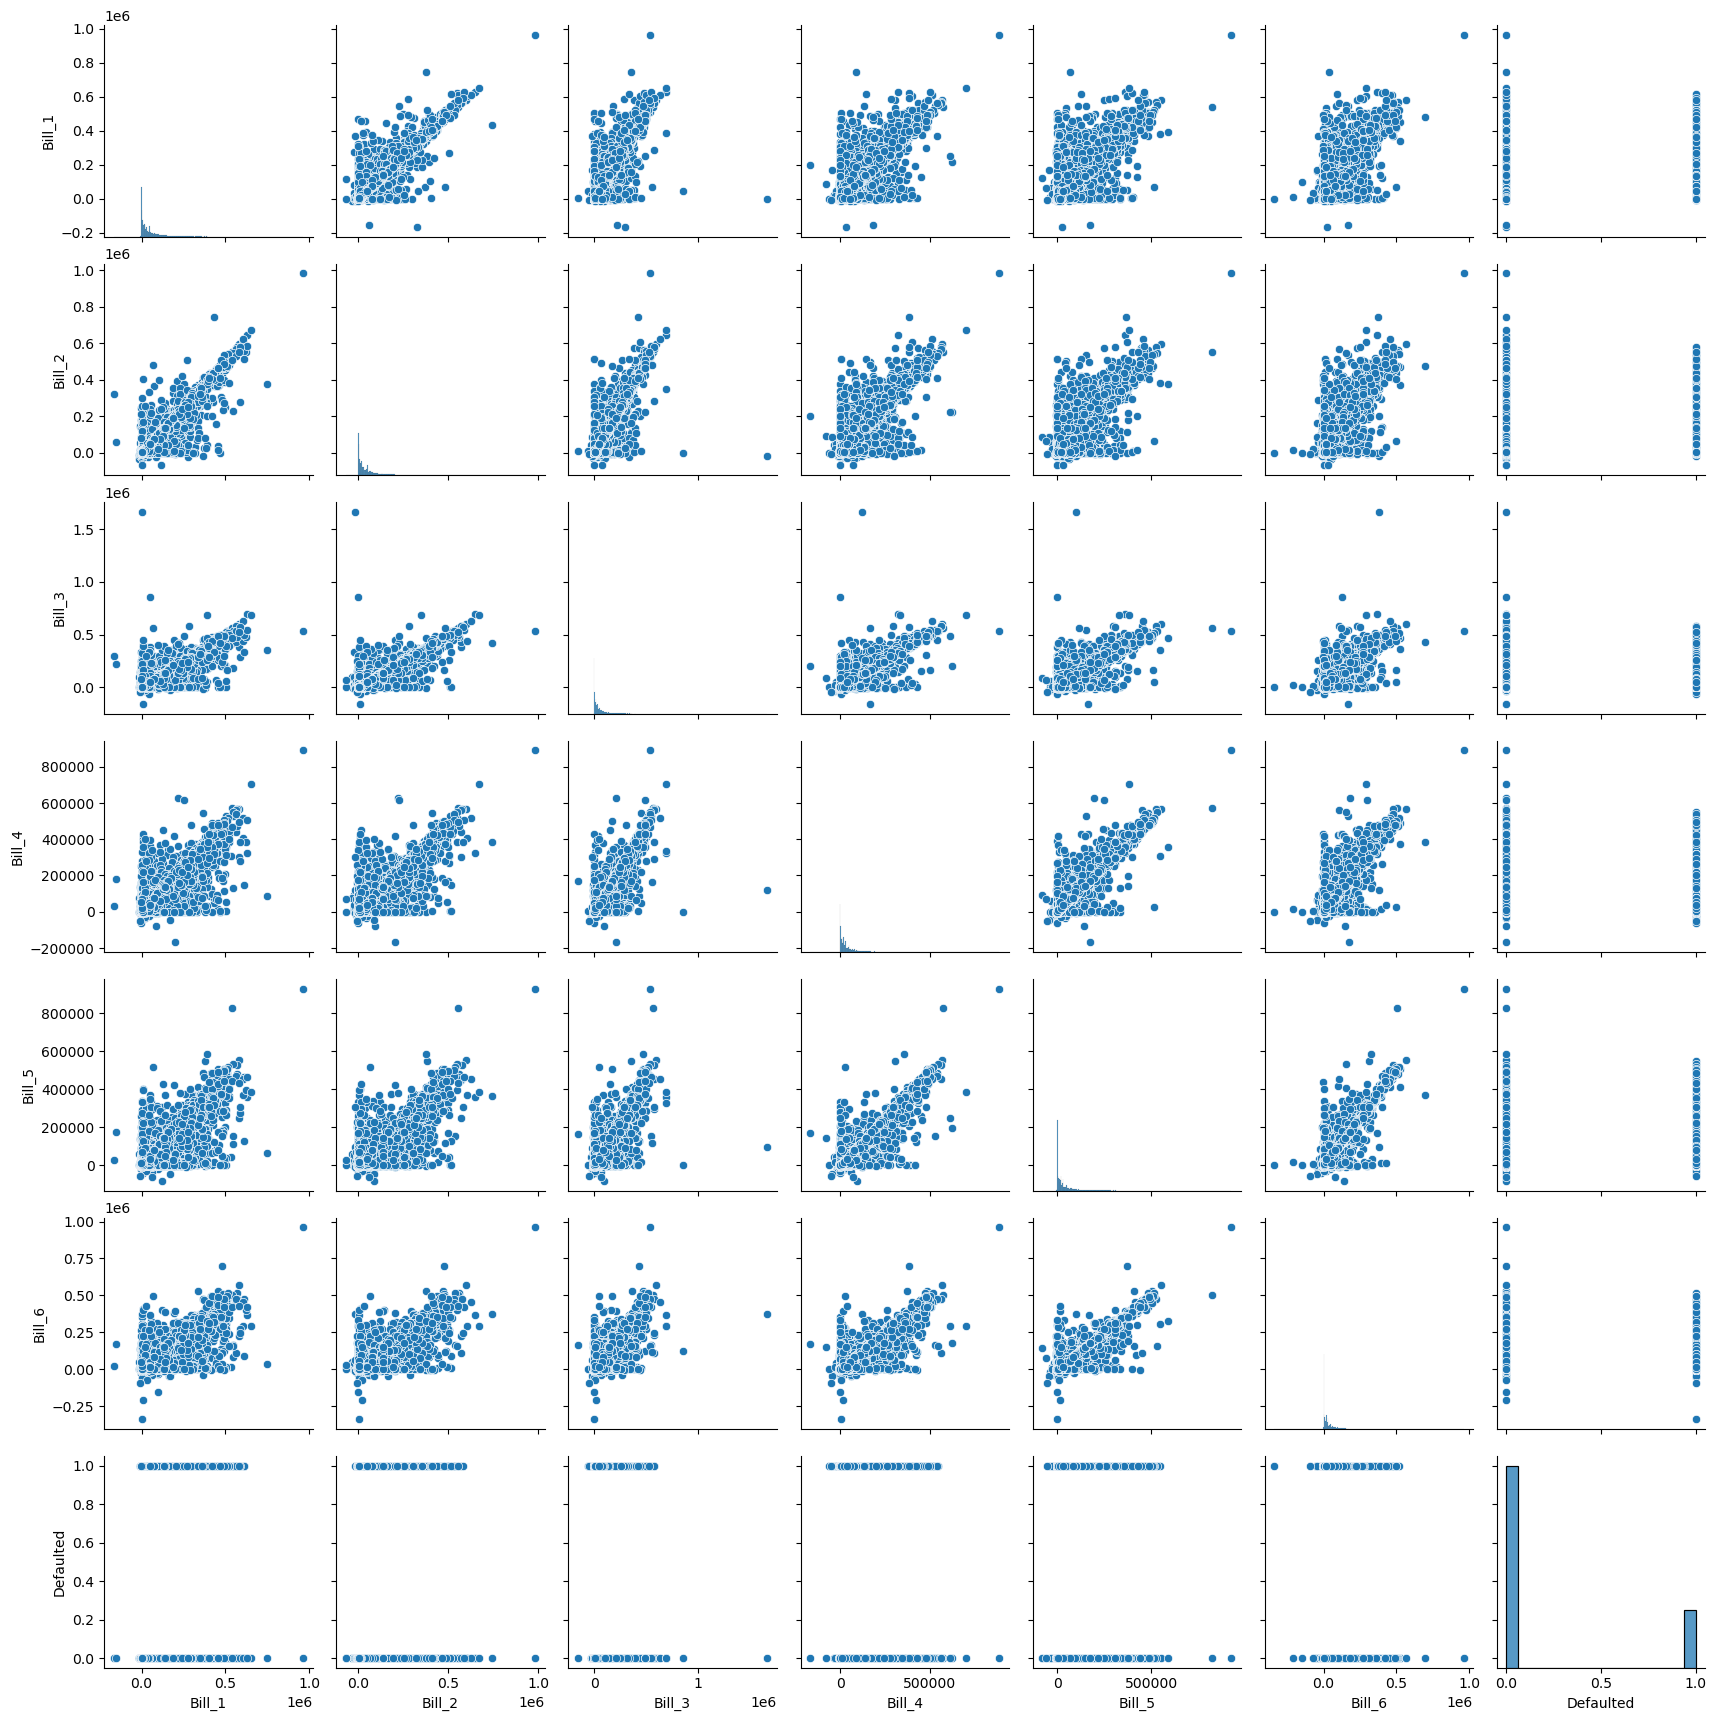

In [18]:
bill_df = df[['Bill_1','Bill_2','Bill_3','Bill_4','Bill_5','Bill_6', 'Defaulted']]
sns.pairplot(data = bill_df)

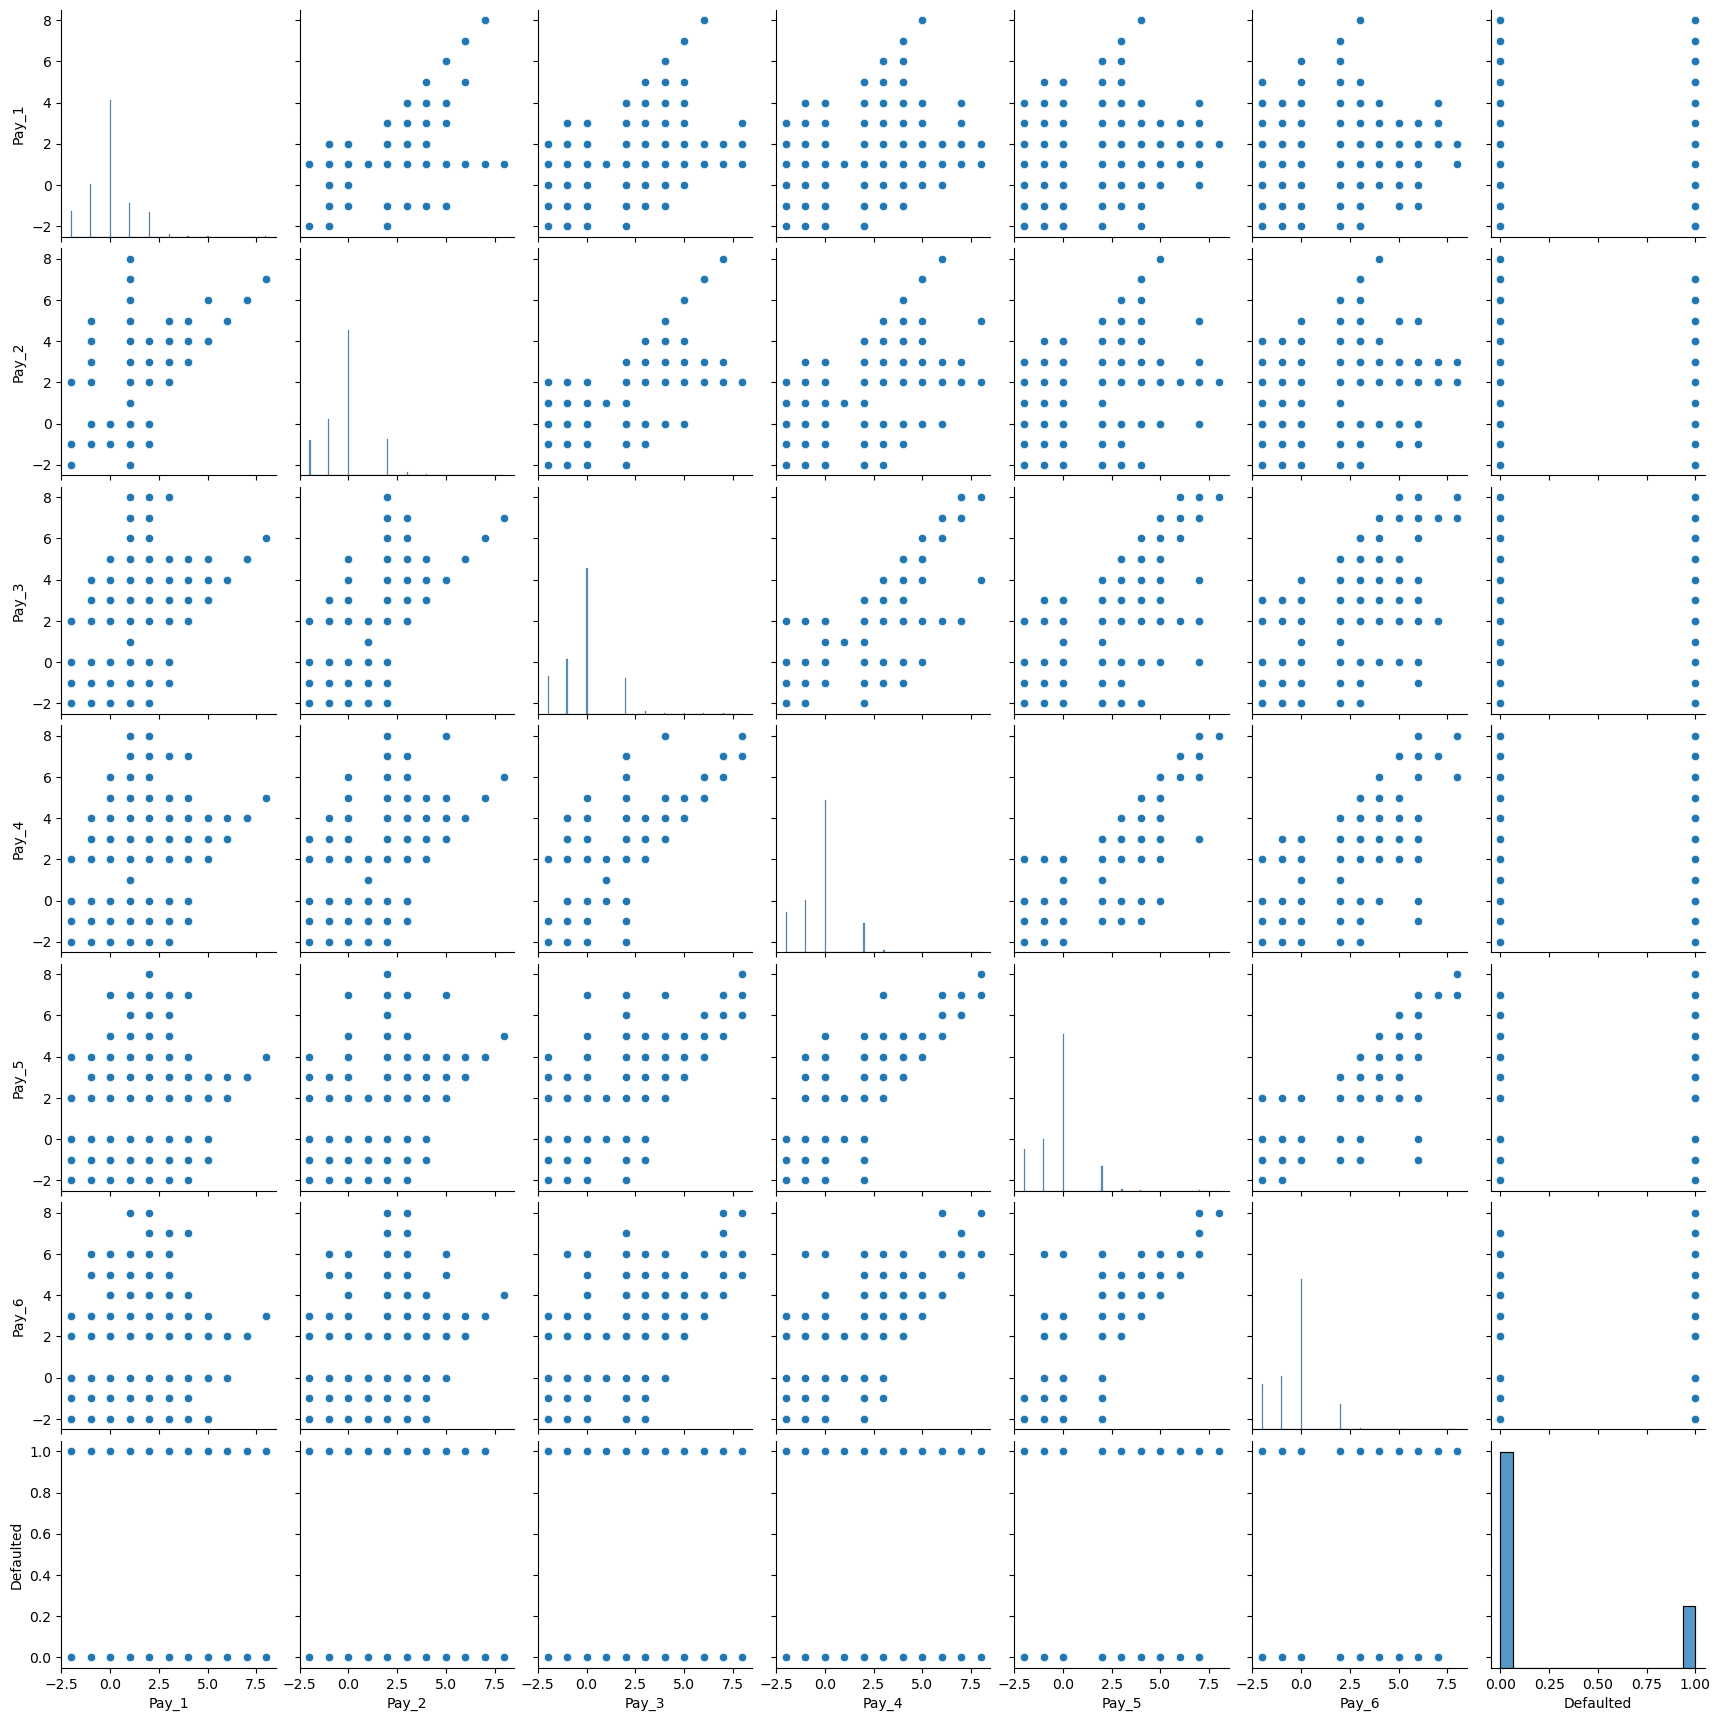

In [19]:
bill_df = df[['Pay_1','Pay_2','Pay_3','Pay_4','Pay_5','Pay_6', 'Defaulted']]
sns.pairplot(data = bill_df)

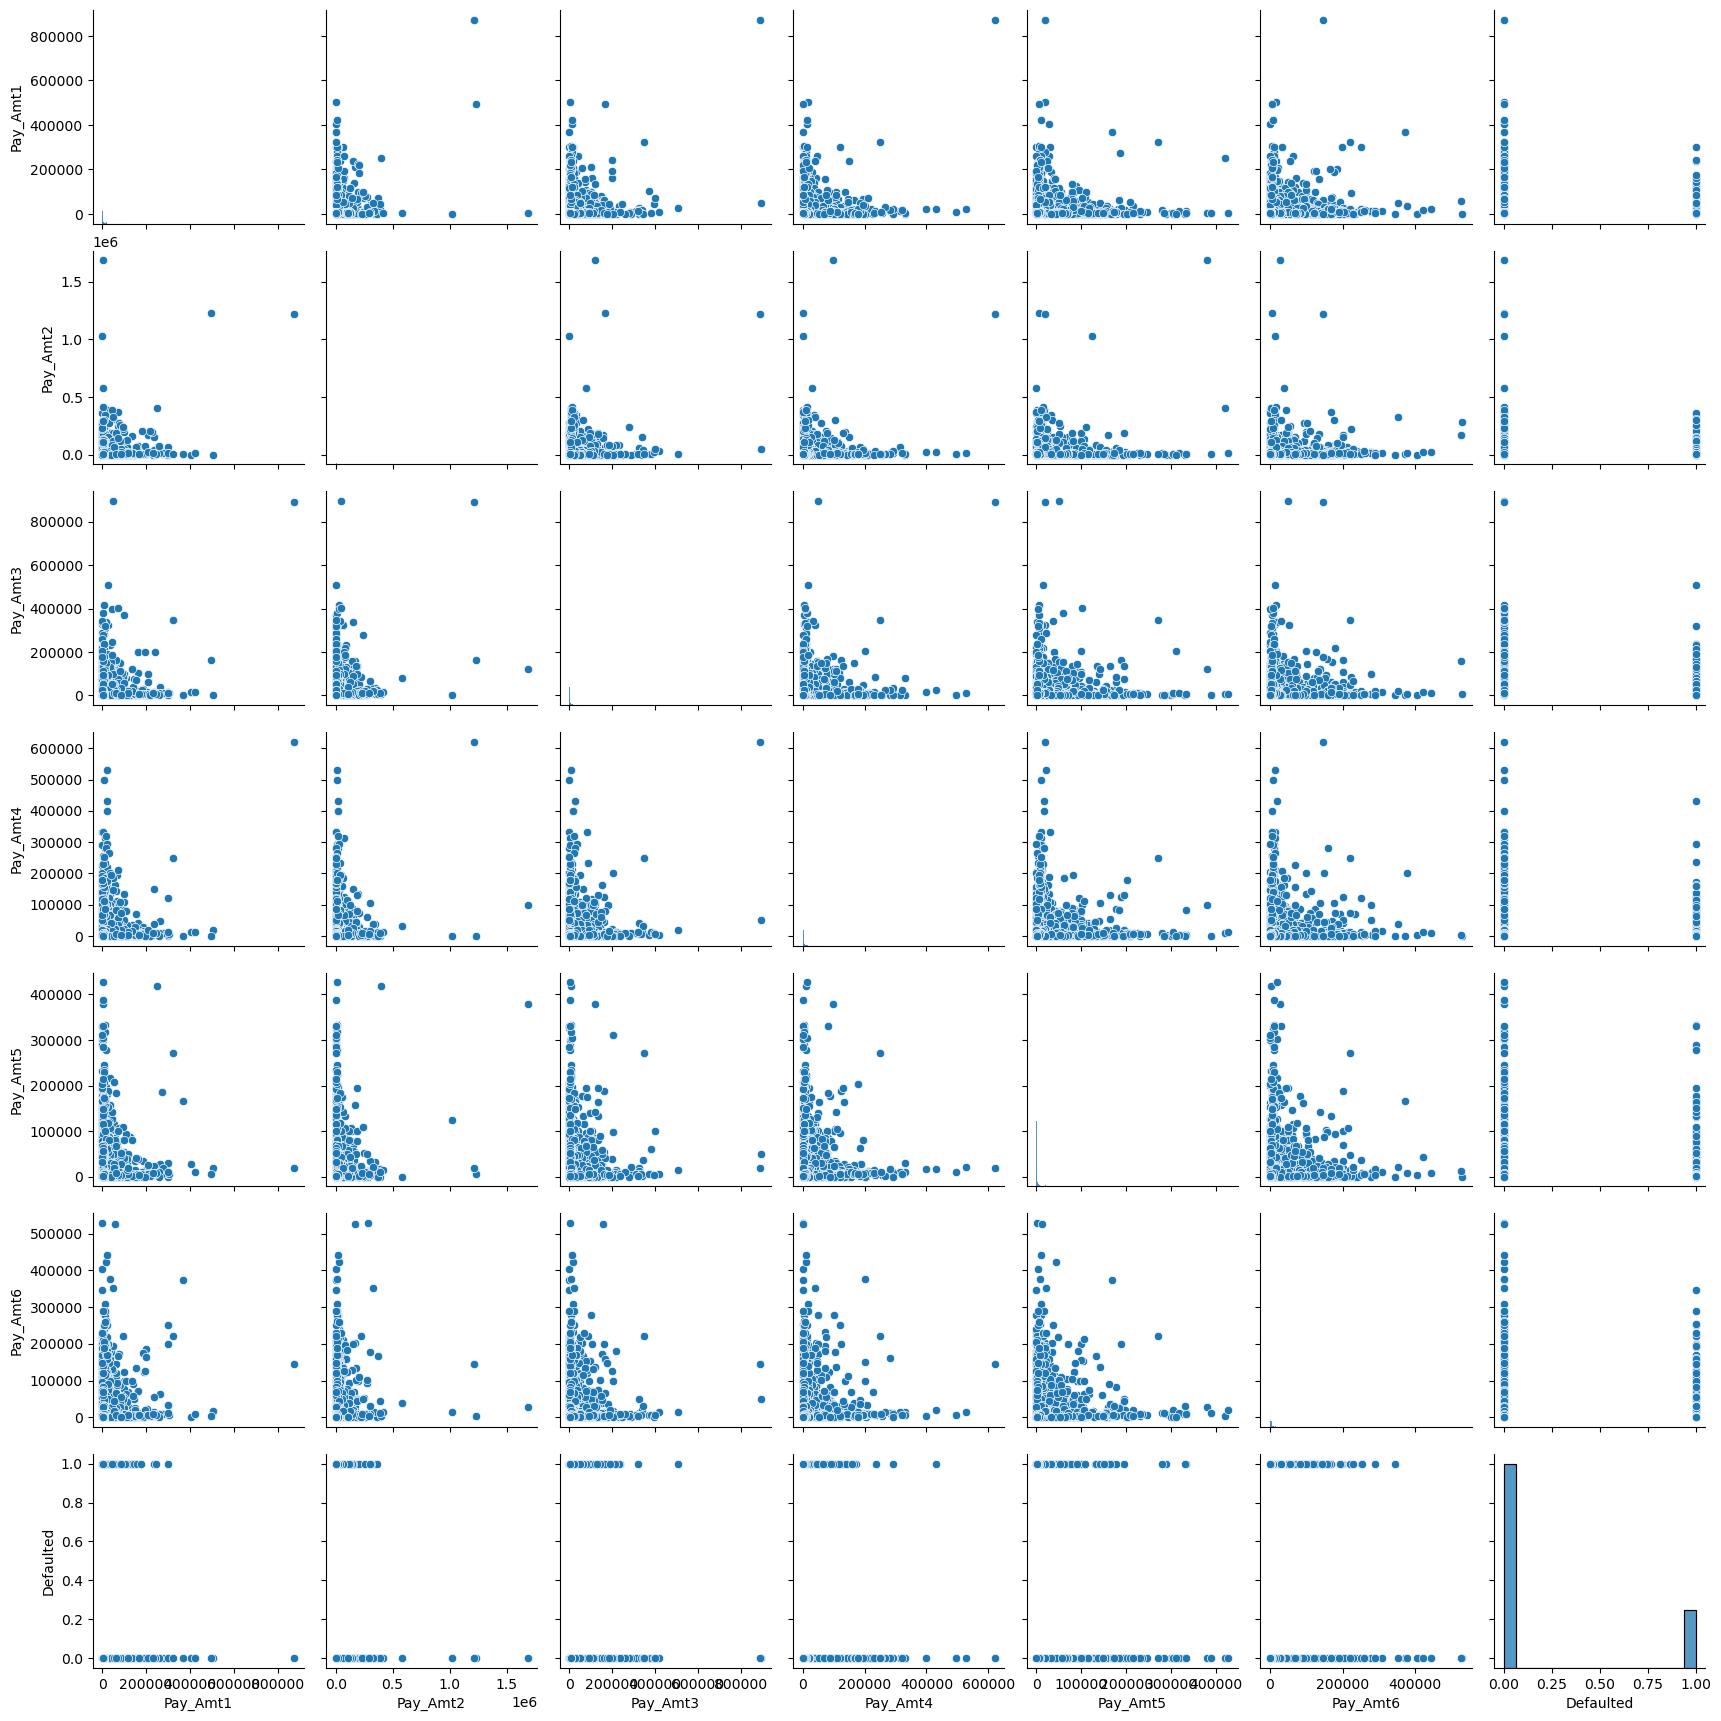

In [20]:
bill_df = df[['Pay_Amt1','Pay_Amt2','Pay_Amt3','Pay_Amt4','Pay_Amt5','Pay_Amt6', 'Defaulted']]
sns.pairplot(data = bill_df)

***

### Splitting into Training and Testing Data

In [21]:
import sklearn
from sklearn.model_selection import train_test_split

features = ['Credit_given', 'Gender', 'Education', 'Marital_Status', 'Age', 'Pay_1','Pay_2', 'Pay_3', 
            'Pay_4', 'Pay_5', 'Pay_6','Bill_1', 'Bill_2',
            'Bill_3', 'Bill_4', 'Bill_5', 'Bill_6', 'Pay_Amt1',
            'Pay_Amt2', 'Pay_Amt3', 'Pay_Amt4', 'Pay_Amt5', 'Pay_Amt6']
y = df['Defaulted'].copy() # target
X = df[features].copy()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=123)

> Test size = 20%, random state = 123

***

### Dealing with Class Imbalances

In [22]:
# Show the count of defaults and not defaulted (Defaulted = 1, Didn't Default = 0)

df['Defaulted'].value_counts()

0    23364
1     6636
Name: Defaulted, dtype: int64

[Text(0, 0, '23364'), Text(0, 0, '6636')]

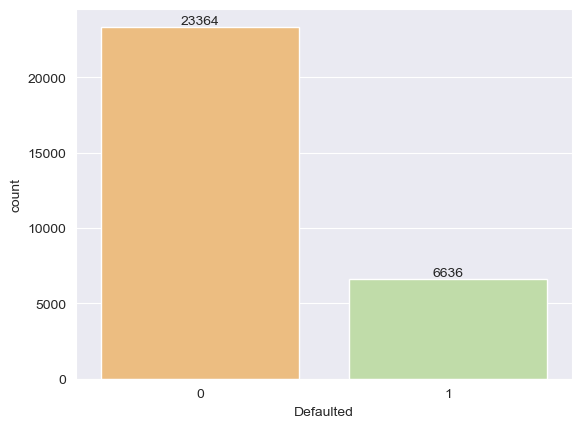

In [23]:
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')


import matplotlib.pyplot as plt
import seaborn as sns


# Set the style of the background
sns.set_style("darkgrid") 


# Plot the data
ax = sns.countplot(x='Defaulted', data=df, palette="Spectral")
ax.bar_label(ax.containers[0])

> The above two cells show we have an imbalanced dataset becuase there are only 6,636 people that defaulted out of the 30,000 total people

In [24]:
# create the training df by remerging X_train and y_train
df_train = X_train.join(y_train)

In [25]:
from sklearn.utils import resample

# Separate majority and minority classes
df_majority = df_train[df_train.Defaulted==0]
df_minority = df_train[df_train.Defaulted==1]

print(df_majority.Defaulted.count())
print("-----------")
print(df_minority.Defaulted.count())
print("-----------")
print(df_train.Defaulted.value_counts())

18668
-----------
5332
-----------
0    18668
1     5332
Name: Defaulted, dtype: int64


In [26]:
# Upsample minority class
df_minority_upsampled = resample(df_minority, 
                                 replace=True,     # sample with replacement
                                 n_samples=18668,    # to match majority class
                                 random_state=123) # reproducible results
# Combine majority class with upsampled minority class
df_upsampled = pd.concat([df_majority, df_minority_upsampled])
# Display new class counts
df_upsampled.Defaulted.value_counts()

0    18668
1    18668
Name: Defaulted, dtype: int64

> Upsampling refers to adding data samples to the minority classes in order to create a more balanced dataset..By upsampling the minority class, we now have an even balance between defaulted and non-defaulted in the training data.  One thing to be aware of as we move forward with modeling is upsampling the minority class may overfit the model.

***

## Modeling

*Ismael to model*